<a href="https://colab.research.google.com/github/iMrugesh9/ML_Class_Capstone/blob/main/Cardiovascular_Risk_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Start

In [1]:
# !pip install datawig
# !pip install scikit-learn==0.23.1
# !pip install imbalanced-learn==0.7.0
import datawig


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

from numpy import math
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


# New Section

In [3]:
from google.colab import drive
drive.mount('/content/drive')      

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
Dataset=pd.read_csv('/content/drive/MyDrive/Datasets/data_cardiovascular_risk.csv')

In [5]:
Dataset

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [6]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
id                 3390 non-null int64
age                3390 non-null int64
education          3303 non-null float64
sex                3390 non-null object
is_smoking         3390 non-null object
cigsPerDay         3368 non-null float64
BPMeds             3346 non-null float64
prevalentStroke    3390 non-null int64
prevalentHyp       3390 non-null int64
diabetes           3390 non-null int64
totChol            3352 non-null float64
sysBP              3390 non-null float64
diaBP              3390 non-null float64
BMI                3376 non-null float64
heartRate          3389 non-null float64
glucose            3086 non-null float64
TenYearCHD         3390 non-null int64
dtypes: float64(9), int64(6), object(2)
memory usage: 450.4+ KB


In [7]:
# Target Variable
Dataset.TenYearCHD.value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

As there is imbalance in traget variable, resampling must be done on train dataset (SMOTE) +Tree based Algo can work better

In [8]:
Dataset.describe(include='all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


In [9]:
Dataset.education.value_counts()

1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

Education feature with only four unique values; So It is considered a categorical feature.

In [10]:
Categorical_features=['sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes','education']

In [11]:
Numeric_Features=[x for x in Dataset.describe().columns if not x in ['id','TenYearCHD','BPMeds'	,'prevalentStroke','prevalentHyp','diabetes','education']]

In [12]:
Dataset[Numeric_Features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 8 columns):
age           3390 non-null int64
cigsPerDay    3368 non-null float64
totChol       3352 non-null float64
sysBP         3390 non-null float64
diaBP         3390 non-null float64
BMI           3376 non-null float64
heartRate     3389 non-null float64
glucose       3086 non-null float64
dtypes: float64(7), int64(1)
memory usage: 212.0 KB


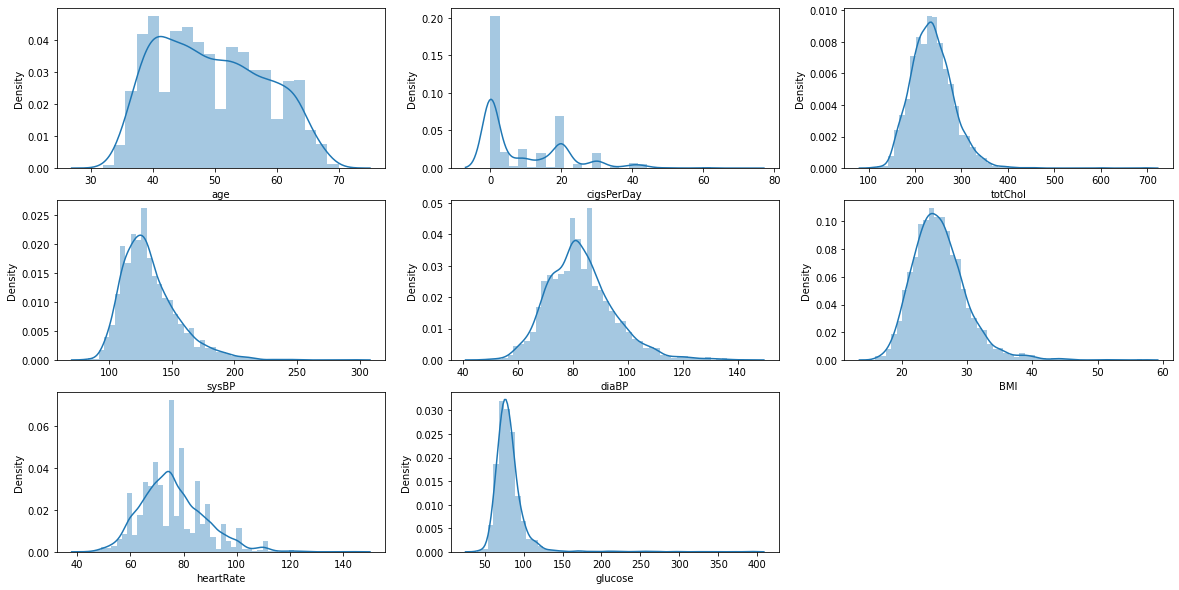

In [13]:
plt.figure(figsize=(20,10))
for num,feat in enumerate(Numeric_Features):
  plt.subplot(3,3,num+1)
  sns.distplot(Dataset[feat])




In [14]:
Dataset['cigsPerDay']=Dataset['cigsPerDay'].fillna(0)
Dataset['totChol']=Dataset['totChol'].fillna(Dataset['totChol'].median())
Dataset['BMI']=Dataset['BMI'].fillna(Dataset['BMI'].median())
Dataset['heartRate']=Dataset['heartRate'].fillna(Dataset['heartRate'].mean())
Dataset['glucose']=Dataset['glucose'].fillna(Dataset['glucose'].median())

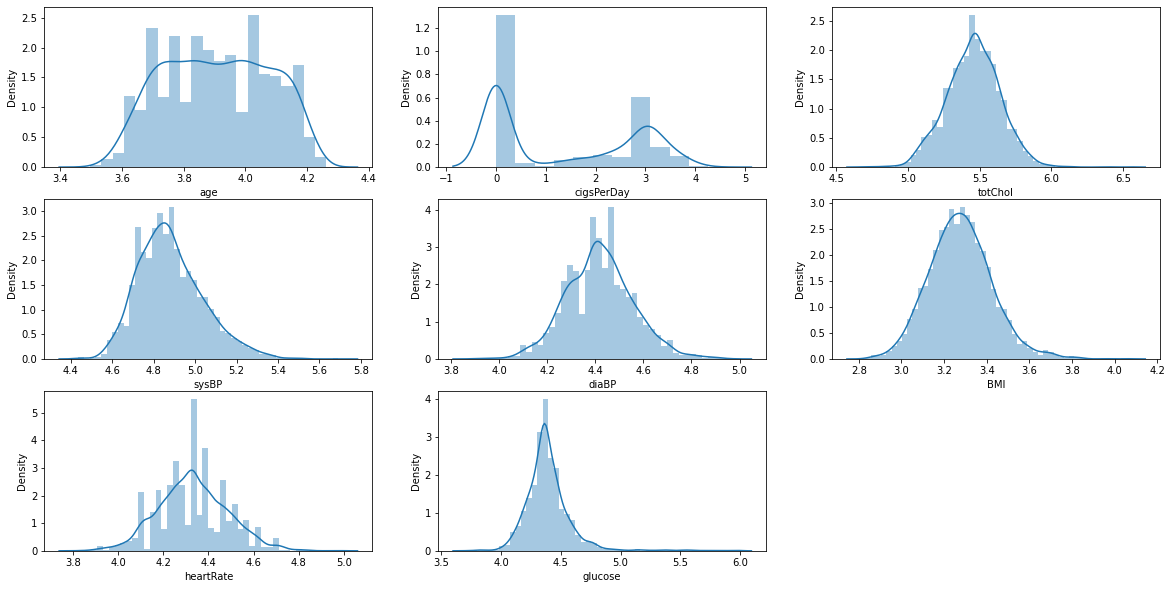

In [15]:
plt.figure(figsize=(20,10))

for num,feat in enumerate(Numeric_Features):
  plt.subplot(3,3,num+1)
  sns.distplot(np.log1p(Dataset[feat]))



In [16]:
Dataset[Categorical_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 7 columns):
sex                3390 non-null object
is_smoking         3390 non-null object
BPMeds             3346 non-null float64
prevalentStroke    3390 non-null int64
prevalentHyp       3390 non-null int64
diabetes           3390 non-null int64
education          3303 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 185.5+ KB


In [17]:
Dataset.BPMeds.value_counts()

0.0    3246
1.0     100
Name: BPMeds, dtype: int64

In [18]:
Dataset['BPMeds']=Dataset.BPMeds.fillna(0)#na values filled with mode 

In [19]:
Dataset.education.value_counts()

1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

Education feature has about 90 NaN values and there is no clear major mode exists. So we need to think some other way of imputing.
(categorical feature hence no mean/median imputation is reasonable).

In [20]:
#features and label
X=Dataset[Numeric_Features+Categorical_features]
y=Dataset['TenYearCHD']
X['is_smoking']=[1 if x=='YES' else 0 for x in X['is_smoking']]#mapping 
X=pd.get_dummies(X,columns=['sex'],prefix='sex')#one-hot encoding
X

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,education,sex_F,sex_M
0,64,3.0,221.0,148.0,85.0,25.38,90.0,80.0,1,0.0,0,0,0,2.0,1,0
1,36,0.0,212.0,168.0,98.0,29.77,72.0,75.0,0,0.0,0,1,0,4.0,0,1
2,46,10.0,250.0,116.0,71.0,20.35,88.0,94.0,1,0.0,0,0,0,1.0,1,0
3,50,20.0,233.0,158.0,88.0,28.26,68.0,94.0,1,0.0,0,1,0,1.0,0,1
4,64,30.0,241.0,136.5,85.0,26.42,70.0,77.0,1,0.0,0,0,0,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,0.0,261.0,123.5,79.0,29.28,70.0,103.0,0,0.0,0,0,0,1.0,1,0
3386,46,0.0,199.0,102.0,56.0,21.96,80.0,84.0,0,0.0,0,0,0,1.0,1,0
3387,44,3.0,352.0,164.0,119.0,28.92,73.0,72.0,1,0.0,0,1,0,3.0,0,1
3388,60,0.0,191.0,167.0,105.0,23.01,80.0,85.0,0,0.0,0,1,0,1.0,0,1


In [21]:
#Using Datawig to impute education null values
df_train, df_test = datawig.utils.random_split(X)

#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    input_columns=X.columns, 
    output_column= 'education', 
    output_path = 'imputer_model' 
    )

#Fit an imputer model on the train data
imputer.fit(train_df=df_train, num_epochs=50)


2022-04-15 20:42:07,512 [INFO]  
========== start: fit model
2022-04-15 20:42:07,514 [WARNING]  Already bound, ignoring bind()
2022-04-15 20:42:07,644 [INFO]  Epoch[0] Batch [0-77]	Speed: 10546.35 samples/sec	cross-entropy=3.669604	education-accuracy=0.000000
2022-04-15 20:42:07,762 [INFO]  Epoch[0] Train-cross-entropy=2.442759
2022-04-15 20:42:07,769 [INFO]  Epoch[0] Train-education-accuracy=0.000000
2022-04-15 20:42:07,776 [INFO]  Epoch[0] Time cost=0.255
2022-04-15 20:42:07,785 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2022-04-15 20:42:07,802 [INFO]  Epoch[0] Validation-cross-entropy=0.876943
2022-04-15 20:42:07,808 [INFO]  Epoch[0] Validation-education-accuracy=0.000000
2022-04-15 20:42:07,950 [INFO]  Epoch[1] Batch [0-77]	Speed: 9189.27 samples/sec	cross-entropy=0.448363	education-accuracy=0.000000
2022-04-15 20:42:08,204 [INFO]  Epoch[1] Train-cross-entropy=0.305364
2022-04-15 20:42:08,211 [INFO]  Epoch[1] Train-education-accuracy=0.000000
2022-04-15 20:42:08,

In [22]:
X_imputed=imputer.predict(X)

In [23]:
X_imputed['education'].isnull().value_counts()

False    3303
True       87
Name: education, dtype: int64

In [24]:
X_imputed.loc[X_imputed['education'].isnull(),'education'] = X_imputed['education_imputed']


In [25]:
X_imputed['education'].isnull().value_counts()

False    3390
Name: education, dtype: int64

In [26]:
X_imputed.drop(columns='education_imputed')


,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,education,sex_F,sex_M
0,64,3.0,221.0,148.0,85.0,25.38,90.0,80.0,1,0.0,0,0,0,2.0,1,0
1,36,0.0,212.0,168.0,98.0,29.77,72.0,75.0,0,0.0,0,1,0,4.0,0,1
2,46,10.0,250.0,116.0,71.0,20.35,88.0,94.0,1,0.0,0,0,0,1.0,1,0
3,50,20.0,233.0,158.0,88.0,28.26,68.0,94.0,1,0.0,0,1,0,1.0,0,1
4,64,30.0,241.0,136.5,85.0,26.42,70.0,77.0,1,0.0,0,0,0,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,0.0,261.0,123.5,79.0,29.28,70.0,103.0,0,0.0,0,0,0,1.0,1,0
3386,46,0.0,199.0,102.0,56.0,21.96,80.0,84.0,0,0.0,0,0,0,1.0,1,0
3387,44,3.0,352.0,164.0,119.0,28.92,73.0,72.0,1,0.0,0,1,0,3.0,0,1
3388,60,0.0,191.0,167.0,105.0,23.01,80.0,85.0,0,0.0,0,1,0,1.0,0,1


In [27]:
# #normalizing and transforming numerical features to better scale 
X_imputed[Numeric_Features]=X_imputed[Numeric_Features].apply(np.log1p)
X_imputed[Numeric_Features]=X_imputed[Numeric_Features].apply(zscore)
X_imputed

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,education,sex_F,sex_M,education_imputed
0,1.560602,0.020119,-0.282994,0.773215,0.248443,-0.030036,1.174479,0.010829,1,0.0,0,0,0,2.0,1,0,1.744746
1,-1.744449,-0.924209,-0.506064,1.571906,1.251457,1.012735,-0.271038,-0.315204,0,0.0,0,1,0,4.0,0,1,3.647809
2,-0.341239,0.709211,0.378777,-0.759914,-1.017546,-1.463136,1.028726,0.826619,1,0.0,0,0,0,1.0,1,0,1.054844
3,0.137847,1.149687,0.000760,1.185127,0.492755,0.671868,-0.640635,0.826619,1,0.0,0,1,0,1.0,0,1,1.015174
4,1.560602,1.414986,0.181957,0.263874,0.248443,0.231896,-0.453233,-0.182287,1,0.0,0,0,0,1.0,1,0,0.978779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,1.188061,-0.924209,0.609966,-0.365923,-0.266846,0.903991,-0.453233,1.289778,0,0.0,0,0,0,1.0,1,0,0.986539
3386,-0.341239,-0.924209,-0.845504,-1.568069,-2.682067,-0.970644,0.410989,0.257479,0,0.0,0,0,0,1.0,1,0,1.057506
3387,-0.596302,0.020119,2.216878,1.420014,2.622119,0.822971,-0.181804,-0.521285,1,0.0,0,1,0,3.0,0,1,2.710275
3388,1.188061,-0.924209,-1.065538,1.534273,1.738236,-0.667725,0.410989,0.317327,0,0.0,0,1,0,1.0,0,1,0.579074


## Logistic Regression

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X_imputed,y,test_size=0.2,random_state=0)


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
LgR_model=LogisticRegression(max_iter=10000)
LgR_model.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [30]:
train_preds=LgR_model.predict_log_proba(X_train)[:,1]
test_preds=LgR_model.predict_log_proba(X_test)[:,1]


In [31]:
train_class_preds = LgR_model.predict(X_train)
test_class_preds =LgR_model.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix



In [33]:
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)
print('LogisticRegression')
print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

LogisticRegression
The accuracy on train data is  0.8595132743362832
The accuracy on test data is  0.855457227138643


In [34]:
LgR_model_CV = LogisticRegressionCV(
        Cs=list(np.power(10.0, np.arange(-10, 10)))
        ,penalty='l2'
        ,scoring='roc_auc'
        ,random_state=0,
        cv=15
        ,max_iter=10000
        ,fit_intercept=True
        ,tol=10)
LgR_model_CV.fit(X_train,y_train)


LogisticRegressionCV(Cs=[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001,
                         0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0,
                         100000.0, 1000000.0, 10000000.0, 100000000.0,
                         1000000000.0],
                     cv=15, max_iter=10000, random_state=0, scoring='roc_auc',
                     tol=10)

In [35]:
train_class_preds = LgR_model_CV.predict(X_train)
test_class_preds =LgR_model_CV.predict(X_test)

In [36]:
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)
print('LogisticRegression CV')
print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

LogisticRegression CV
The accuracy on train data is  0.8576696165191741
The accuracy on test data is  0.8539823008849557


In [37]:
print ('Max roc-auc:', LgR_model_CV.scores_[1].max())

Max roc-auc: 0.8249158249158249


In [38]:
confusion_matrix(y_test,test_class_preds)

array([[571,   3],
       [ 96,   8]])

# Random Forest

In [96]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score,classification_report,f1_score



In [40]:
RF_model=RandomForestClassifier()
grid_values={'n_estimators':[50,80,100],'max_depth':[3,5,7]}
RF_model_CV=GridSearchCV(RF_model,param_grid=grid_values,scoring='roc_auc',cv=5)
RF_model_CV.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]},
             scoring='roc_auc')

In [41]:
train_preds =  RF_model_CV.predict(X_train)
test_preds  = RF_model_CV.predict(X_test)

In [42]:
roc_auc_score(y_train,train_preds)

0.5810810810810811

In [43]:
roc_auc_score(y_test,test_preds)

0.4978390511927097

In [44]:
confusion_matrix(y_train,train_preds)

array([[2305,    0],
       [ 341,   66]])

In [45]:
confusion_matrix(y_test,test_preds)

array([[566,   8],
       [103,   1]])

Using SMOTE for balancing

# SMOTE

In [46]:
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.pipeline import Pipeline,make_pipeline

In [47]:
over = SMOTE()

In [48]:
# !pip install scikit-learn==0.23.1
# !pip install imbalanced-learn==0.7.0

In [49]:
X_rescaled,y_rescaled=over.fit_resample(X_imputed,y)


In [50]:
print('Label Size before ',y.shape[0])
print('Label Size After ',y_rescaled.shape[0])

Label Size before  3390
Label Size After  5758


In [51]:
over = SMOTE()
under = RandomUnderSampler()
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [52]:
X_rescaled,y_rescaled=pipeline.fit_resample(X_imputed,y)

In [53]:
print('Label Size before ',y.shape[0])
print('Label Size After ',y_rescaled.shape[0])

Label Size before  3390
Label Size After  5758


In [54]:
X_train_sm,X_test_sm,y_train_sm,y_test_sm=train_test_split(X_rescaled,y_rescaled,test_size=0.2,random_state=0)


## RF

In [55]:
RF_model=RandomForestClassifier()
grid_values={'n_estimators':[50,100,200],'max_depth':[3,5,7]}
RF_model_CV=GridSearchCV(RF_model,param_grid=grid_values,scoring='roc_auc',cv=7)
RF_model_CV.fit(X_train_sm,y_train_sm)


GridSearchCV(cv=7, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc')

In [56]:
RF_model = RF_model_CV.best_estimator_

In [57]:
train_preds =  RF_model.predict(X_train_sm)
test_preds  = RF_model.predict(X_test_sm)

In [58]:
roc_auc_score(y_train_sm,train_preds)

0.8363834336395312

In [59]:
roc_auc_score(y_test_sm,test_preds)

0.7663003011512479

In [60]:
train_accuracy = accuracy_score(y_train_sm,train_preds)
test_accuracy = accuracy_score(y_test_sm,test_preds)
print('RF CV+SMOTE')
print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

RF CV+SMOTE
The accuracy on train data is  0.8363004776378636
The accuracy on test data is  0.7664930555555556


## XGBoost

In [61]:
from xgboost import XGBClassifier


In [62]:
XGB = XGBClassifier(colsample_bytree = 1, learning_rate = 0.1,max_depth= 8,
                    min_child_weight= 1, alpha = 10, n_estimators = 200)


In [63]:
XGB.fit(X_train_sm,y_train_sm)

XGBClassifier(alpha=10, max_depth=8, n_estimators=200)

In [64]:
train_preds =  XGB.predict(X_train_sm)
test_preds  = XGB.predict(X_test_sm)

In [65]:
roc_auc_score(y_train_sm,train_preds)

0.9982578397212544

In [66]:
roc_auc_score(y_test_sm,test_preds)


0.9115507631275115

In [67]:
confusion_matrix(y_train_sm,train_preds)

array([[2310,    0],
       [   8, 2288]])

In [68]:
confusion_matrix(y_test_sm,test_preds)

array([[523,  46],
       [ 56, 527]])

In [69]:
print(classification_report(y_train_sm,train_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2310
           1       1.00      1.00      1.00      2296

    accuracy                           1.00      4606
   macro avg       1.00      1.00      1.00      4606
weighted avg       1.00      1.00      1.00      4606



In [70]:
print(classification_report(y_test_sm,test_preds))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       569
           1       0.92      0.90      0.91       583

    accuracy                           0.91      1152
   macro avg       0.91      0.91      0.91      1152
weighted avg       0.91      0.91      0.91      1152



In [71]:
features = X_train_sm.columns
importances = XGB.feature_importances_
indices = np.argsort(importances)

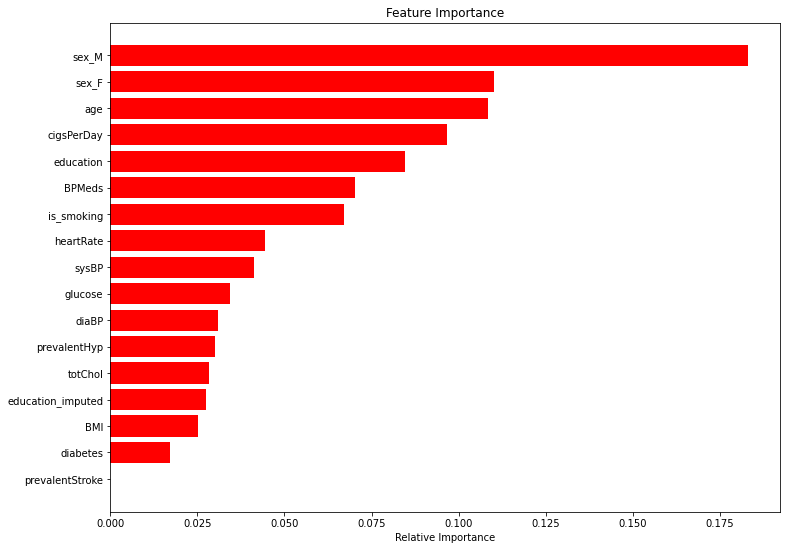

In [72]:
plt.figure(figsize=(12,9))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Naive-Bayes

In [91]:
from sklearn.naive_bayes import GaussianNB


In [100]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-12, num=200)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train_sm, y_train_sm)

gs_NB.best_params_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    7.3s finished


{'var_smoothing': 0.21711179456945043}

In [101]:
train_preds =gs_NB.predict(X_train_sm)
test_preds  = gs_NB.predict(X_test_sm)

In [102]:
roc_auc_score(y_train_sm,train_preds)

0.6424163235138846

In [95]:
roc_auc_score(y_test_sm,test_preds)


0.6228223810543007

In [96]:
confusion_matrix(y_train_sm,train_preds)

array([[1654,  656],
       [ 990, 1306]])

In [97]:
confusion_matrix(y_test_sm,test_preds)

array([[415, 154],
       [282, 301]])

In [98]:
print(classification_report(y_train_sm,train_preds))

              precision    recall  f1-score   support

           0       0.63      0.72      0.67      2310
           1       0.67      0.57      0.61      2296

    accuracy                           0.64      4606
   macro avg       0.65      0.64      0.64      4606
weighted avg       0.65      0.64      0.64      4606



In [99]:
print(classification_report(y_test_sm,test_preds))

              precision    recall  f1-score   support

           0       0.60      0.73      0.66       569
           1       0.66      0.52      0.58       583

    accuracy                           0.62      1152
   macro avg       0.63      0.62      0.62      1152
weighted avg       0.63      0.62      0.62      1152



## Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
grid={'n_estimators':[1000],'learning_rate':[1]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model = AdaBoostClassifier()
ADA = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')


In [ ]:
ADA_model=ADA.fit(X_train_sm,y_train_sm)

In [ ]:
ADA_model.best_params_

In [ ]:
train_preds =ADA_model.predict(X_train_sm)
test_preds  =ADA_model.predict(X_test_sm)

In [ ]:
roc_auc_score(y_train_sm,train_preds)

In [ ]:
roc_auc_score(y_test_sm,test_preds)


In [ ]:
confusion_matrix(y_train_sm,train_preds)

In [ ]:
confusion_matrix(y_test_sm,test_preds)

In [ ]:
print(classification_report(y_train_sm,train_preds))

In [ ]:
print(classification_report(y_test_sm,test_preds))

## knn

In [118]:
from sklearn.neighbors import KNeighborsClassifier


In [146]:
knn = KNeighborsClassifier(n_neighbors=2)

In [147]:
knn.fit(X_train_sm,y_train_sm)

KNeighborsClassifier(n_neighbors=2)

In [148]:
train_preds =knn.predict(X_train_sm)
test_preds  =knn.predict(X_test_sm)

In [149]:
ROCAUC_train=roc_auc_score(y_train_sm,train_preds)
ROCAUC_test=roc_auc_score(y_test_sm,test_preds)
print('ROC_AUC score for train data: ',ROCAUC_train)
print('ROC_AUC score for test data: ',ROCAUC_test)

ROC_AUC score for train data:  0.9932491289198606
ROC_AUC score for test data:  0.8889493469027242


In [150]:
f1_train=f1_score(y_train_sm,train_preds)
f1_test=f1_score(y_test_sm,test_preds)
print('f1 score for train data: ',f1_train)
print('f1 score for test data: ',f1_test)

f1 score for train data:  0.9932032449024336
f1 score for test data:  0.8976631748589846


In [151]:
print('Confusion Matrix for Train\n')
print(confusion_matrix(y_train_sm,train_preds))
print('\nConfusion Matrix for Test\n')
print(confusion_matrix(y_test_sm,test_preds))

Confusion Matrix for Train

[[2310    0]
 [  31 2265]]

Confusion Matrix for Test

[[468 101]
 [ 26 557]]


In [152]:
print('classification_report for Train\n')
print(classification_report(y_train_sm,train_preds))
print('\nclassification_report for Test\n')
print(classification_report(y_test_sm,test_preds))

classification_report for Train

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2310
           1       1.00      0.99      0.99      2296

    accuracy                           0.99      4606
   macro avg       0.99      0.99      0.99      4606
weighted avg       0.99      0.99      0.99      4606


classification_report for Test

              precision    recall  f1-score   support

           0       0.95      0.82      0.88       569
           1       0.85      0.96      0.90       583

    accuracy                           0.89      1152
   macro avg       0.90      0.89      0.89      1152
weighted avg       0.90      0.89      0.89      1152



## SVC

In [87]:
# from sklearn.svm import SVC
# param_grid = {'C': [1, 10, 100,1000,10000,100000,1E6], 'gamma': [1,0.1]}
# svc_model=GridSearchCV(SVC(kernel='rbf'),param_grid=param_grid,scoring='f1',cv=5)

In [154]:
from sklearn.svm import SVC

svc_model=SVC(C=10,gamma=1,kernel='rbf')


In [155]:
svc_model.fit(X_train_sm,y_train_sm)

SVC(C=10, gamma=1)

In [156]:
train_preds =svc_model.predict(X_train_sm)
test_preds  =svc_model.predict(X_test_sm)

In [157]:
ROCAUC_train_svc=roc_auc_score(y_train_sm,train_preds)
ROCAUC_test_svc=roc_auc_score(y_test_sm,test_preds)
print('ROC_AUC score for train data: ',ROCAUC_train_svc)
print('ROC_AUC score for test data: ',ROCAUC_test_svc)

ROC_AUC score for train data:  0.9997835497835498
ROC_AUC score for test data:  0.9332448067236011


In [158]:
f1_train_svc=f1_score(y_train_sm,train_preds)
f1_test_svc=f1_score(y_test_sm,test_preds)
print('f1 score for train data: ',f1_train_svc)
print('f1 score for test data: ',f1_test_svc)

f1 score for train data:  0.9997822773786197
f1 score for test data:  0.9334485738980122


In [159]:
print('Confusion Matrix for Train\n')
print(confusion_matrix(y_train_sm,train_preds))
print('\nConfusion Matrix for Test\n')
print(confusion_matrix(y_test_sm,test_preds))

Confusion Matrix for Train

[[2309    1]
 [   0 2296]]

Confusion Matrix for Test

[[535  34]
 [ 43 540]]


In [160]:
print('classification_report for Train\n')
print(classification_report(y_train_sm,train_preds))
print('\nclassification_report for Test\n')
print(classification_report(y_test_sm,test_preds))

classification_report for Train

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2310
           1       1.00      1.00      1.00      2296

    accuracy                           1.00      4606
   macro avg       1.00      1.00      1.00      4606
weighted avg       1.00      1.00      1.00      4606


classification_report for Test

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       569
           1       0.94      0.93      0.93       583

    accuracy                           0.93      1152
   macro avg       0.93      0.93      0.93      1152
weighted avg       0.93      0.93      0.93      1152



# Conclusion

### <b> SVC model produced best f1_score and rou_auc_score as mentioned below


In [161]:

print('\nROC_AUC score for train data: ',ROCAUC_train_svc)
print('\nROC_AUC score for test data: ',ROCAUC_test_svc)
print('\nf1 score for train data: ',f1_train_svc)
print('\nf1 score for test data: ',f1_test_svc)
print('\nConfusion Matrix for Train\n')
print(confusion_matrix(y_train_sm,train_preds))
print('\nConfusion Matrix for Test\n')
print(confusion_matrix(y_test_sm,test_preds))
print('\nclassification_report for Train\n')
print(classification_report(y_train_sm,train_preds))
print('\nclassification_report for Test\n')
print(classification_report(y_test_sm,test_preds))


ROC_AUC score for train data:  0.9997835497835498

ROC_AUC score for test data:  0.9332448067236011

f1 score for train data:  0.9997822773786197

f1 score for test data:  0.9334485738980122

Confusion Matrix for Train

[[2309    1]
 [   0 2296]]

Confusion Matrix for Test

[[535  34]
 [ 43 540]]

classification_report for Train

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2310
           1       1.00      1.00      1.00      2296

    accuracy                           1.00      4606
   macro avg       1.00      1.00      1.00      4606
weighted avg       1.00      1.00      1.00      4606


classification_report for Test

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       569
           1       0.94      0.93      0.93       583

    accuracy                           0.93      1152
   macro avg       0.93      0.93      0.93      1152
weighted avg       0.93      0.93  